# Midterm Project of Climate Datasets

In [23]:
!pip install geopandas
!pip install plotly
!pip install imagemagick
!pip install --upgrade matplotlib
!pip install pillow
#Importing neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import plotly.express as px
from matplotlib.animation import FuncAnimation
#cartopy python for maps #http://scitools.org.uk/cartopy/
#Folium can be used in python data for local information
#GeoPandas for maps in python geopandas.org it uses cartopy we can map geometry as well it is used for static map
#GeoView for country and shading
#Ploty

ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


In [2]:
#loading first data set from a csv file and importing it as a dataframe named df

df = pd.read_csv("https://raw.githubusercontent.com/mab253/dataviz_fall23/main/midterm-datasets/climate-datasets/GlobalTemperatures.csv")

In [3]:
#Checking first few rows
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [5]:
#checking shape of the data
df.shape

(3192, 9)

In [6]:
#Gathering more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [7]:
#Getting summary of all numerical variables
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [8]:
#Dropping duplicates if there is any
display(df.drop_duplicates())

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


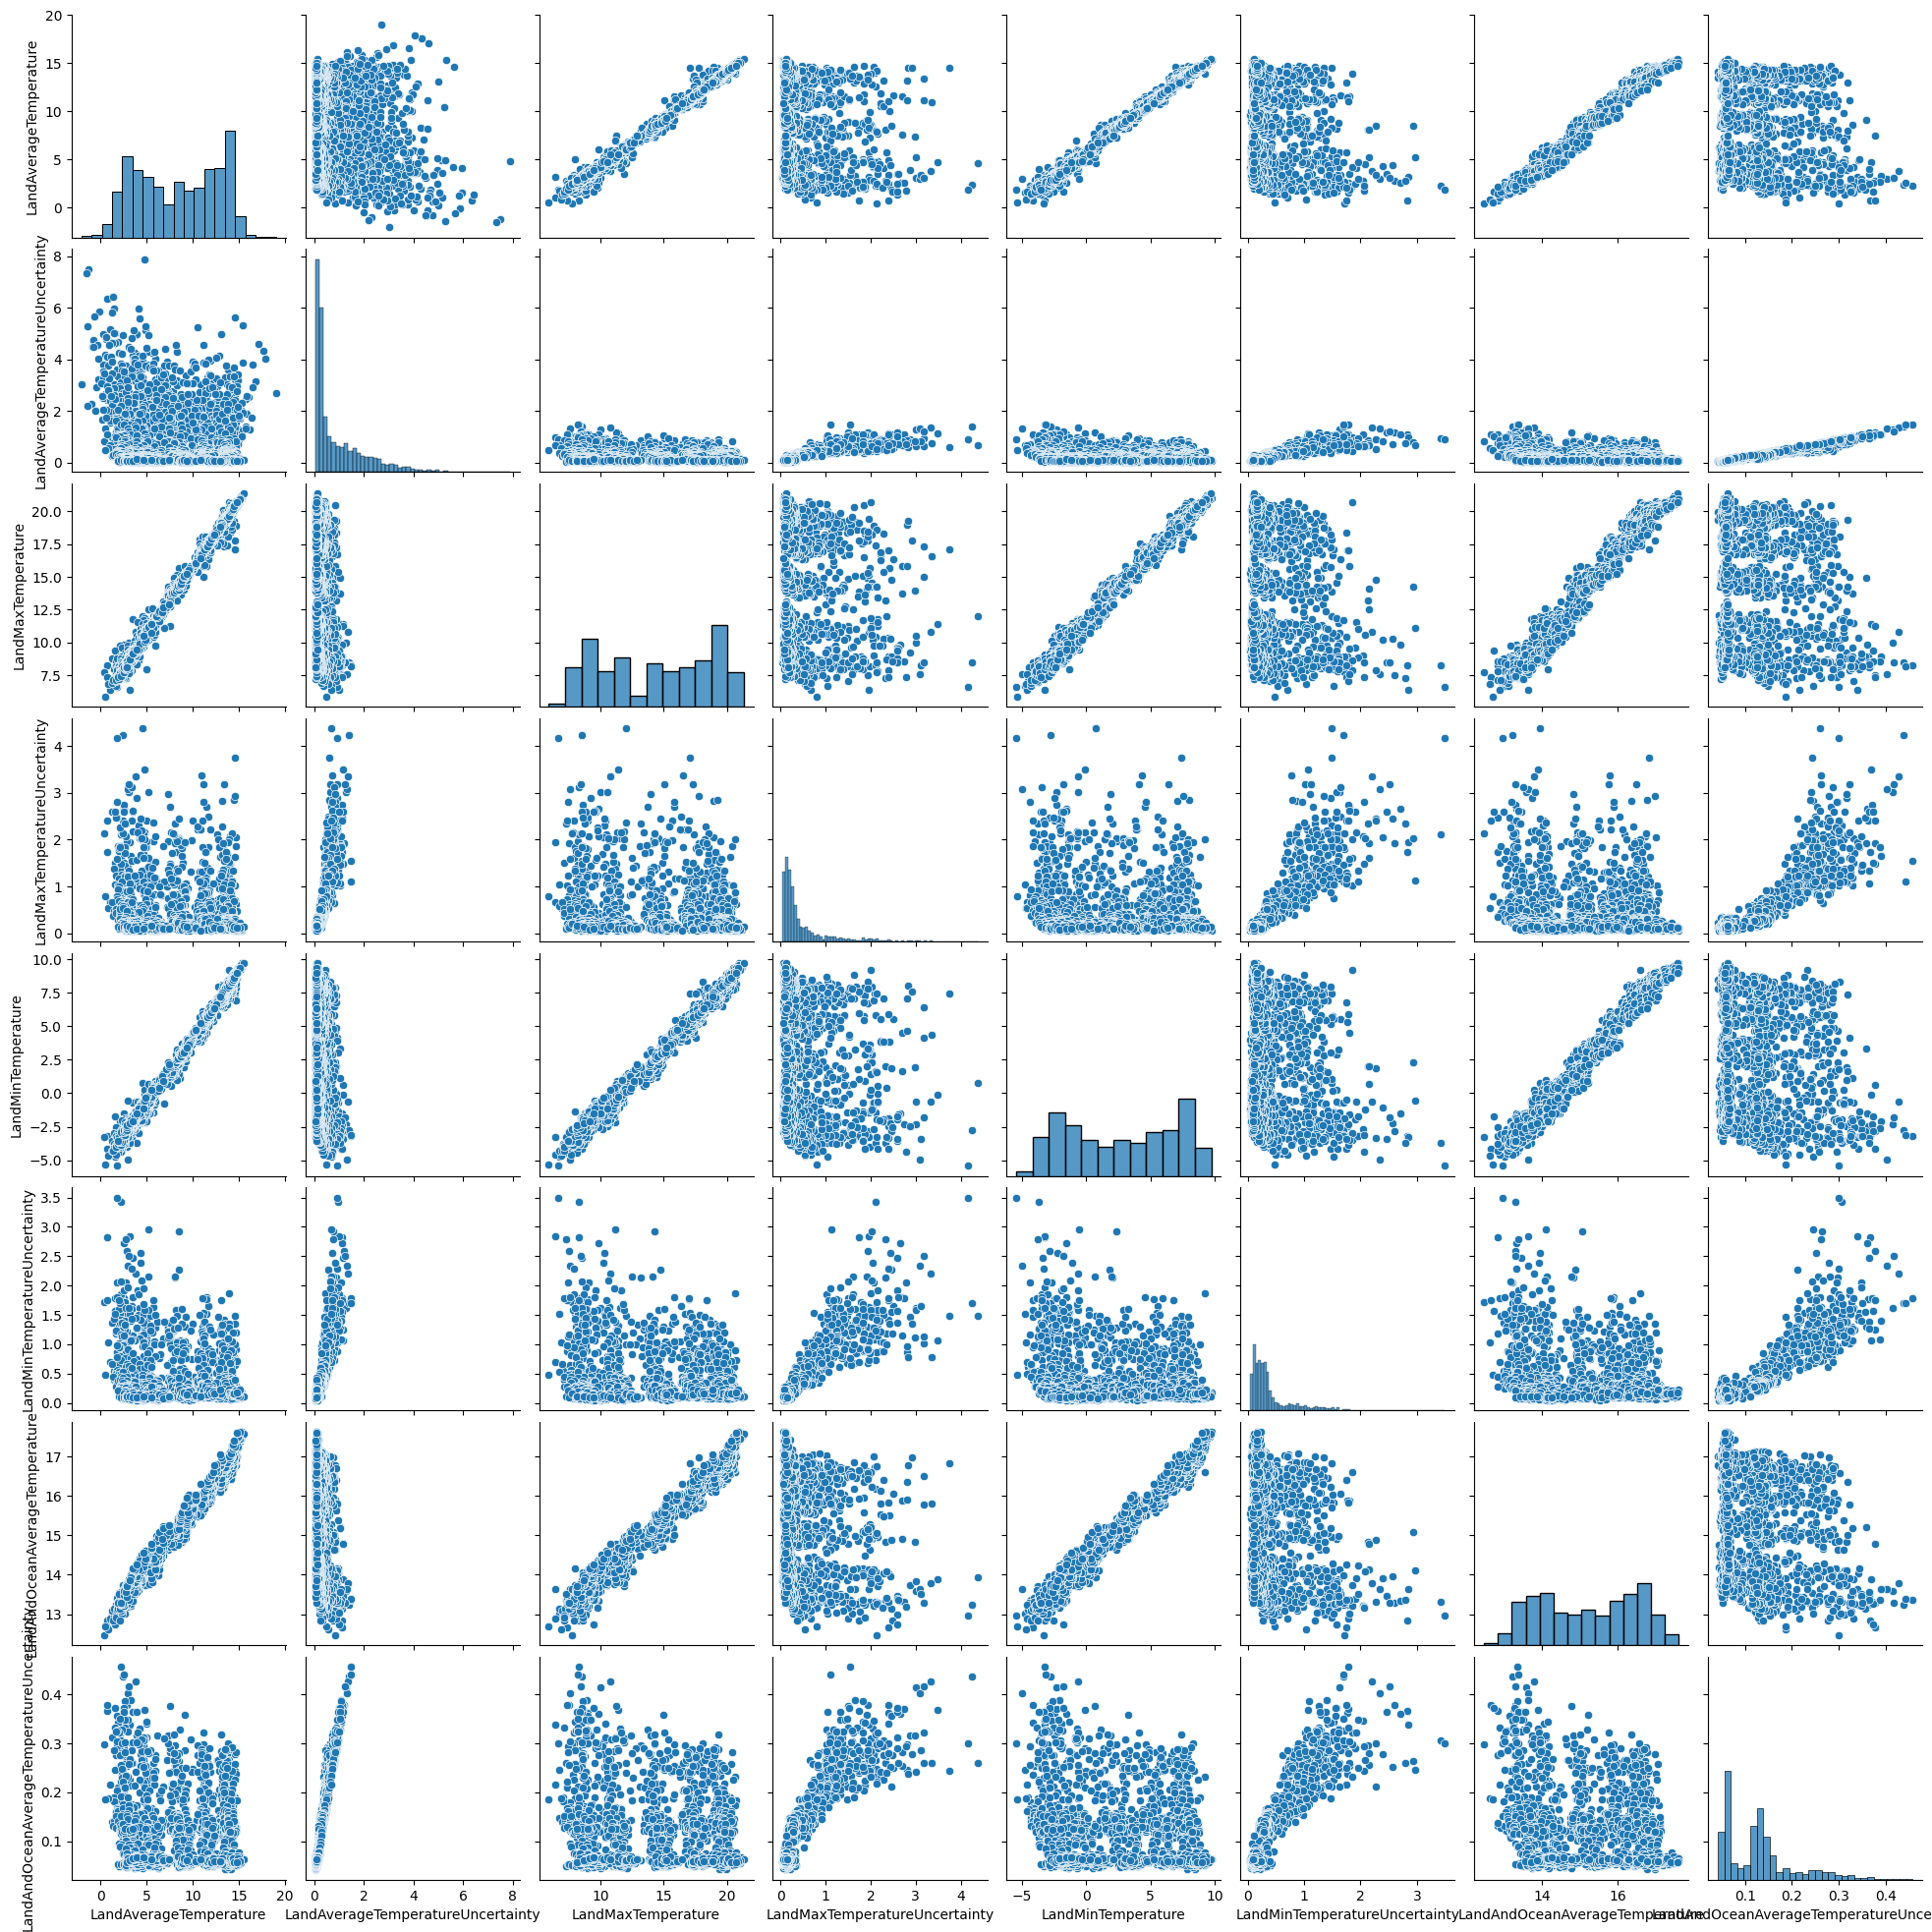

In [9]:
#creating pairplot of data
sns.pairplot(data = df)

In [10]:
#After gathering information it appears that the data is missing for most of the variables except two for the first century
#Before dealing with the missing values of whole dataset
#Dropping missing values from first three columns which is important for my further analysis

df.dropna(subset=['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], inplace=True)

In [11]:
#Grouping the dt column according to 30 years interval
#by first converting 'dt' column to a datetime data type
#then creating a variable 'Intervals' for 'dt'
#Loop through each date in the 'dt' column
#Adding interval column into dataframe
#then printing it

df['dt'] = pd.to_datetime(df['dt'])

#Starting year for the first interval
start_year = 1750
interval_length = 30

# Initializing an empty list to store intervals
Intervals = []

#Looping through each date in the "dt" column
for date in df['dt']:
    year = date.year
    interval_start = start_year
    interval_end = start_year + interval_length - 1

#Checking if the year belongs to the next interval
    while year > interval_end:
        interval_start += interval_length
        interval_end += interval_length

    Intervals.append(f"{interval_start}-{interval_end}")

# Adding the intervals as a new column in the existing DataFrame
df['Interval'] = Intervals

#Chceking first few rows
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Interval
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750-1779
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750-1779
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750-1779
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750-1779
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750-1779


In [12]:
df.shape

(3180, 10)

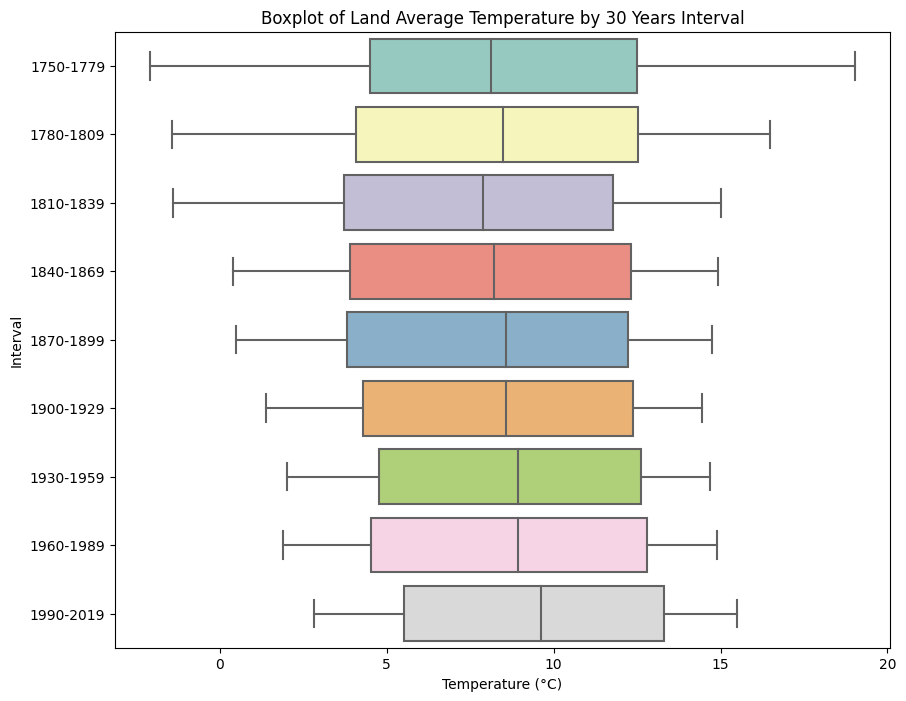

In [13]:
#Creating boxplots of Land Average Temperature by 30 years Interval


#Defining a custom color palette
custom_palette = sns.color_palette("Set3", n_colors=len(df['Interval'].unique()))

#Creating a boxplot with different colors for each interval using Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x= df['LandAverageTemperature'], y= df['Interval'], data=df, orient='h', palette=custom_palette)
plt.title('Boxplot of Land Average Temperature by 30 Years Interval')
plt.xlabel('Temperature (°C)')
plt.ylabel('Interval')
plt.suptitle('')  # Remove the default title added by Seaborn
plt.show()

In [14]:
#Performing one-way ANOVA for the mean comparison among different intervals
intervals = df['Interval'].unique()
groups = [df[df['Interval'] == interval]['LandAverageTemperature'] for interval in intervals]
f_statistic, p_value = f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value is less than the significance level (e.g., 0.05) for statistical significance
if p_value < 0.05:
    print("The ANOVA test indicates significant differences between at least two groups.")
else:
    print("The ANOVA test does not indicate significant differences between groups.")

plt.show()

ANOVA results:
F-statistic: 4.11
P-value: 0.0001
The ANOVA test indicates significant differences between at least two groups.


In [15]:
#To get the idea of which two groups have most significant difference applying another test
# Perform Tukey's HSD test for post hoc analysis
tukey = pairwise_tukeyhsd(endog=df['LandAverageTemperature'], groups=df['Interval'], alpha=0.05)
print(tukey.summary())


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
1750-1779 1780-1809   0.0807    1.0 -0.9377  1.099  False
1750-1779 1810-1839  -0.4545 0.9037 -1.4728 0.5639  False
1750-1779 1840-1869  -0.1289    1.0 -1.1472 0.8895  False
1750-1779 1870-1899  -0.0201    1.0 -1.0384 0.9983  False
1750-1779 1900-1929   0.1655 0.9999 -0.8528 1.1839  False
1750-1779 1930-1959   0.4845 0.8665 -0.5338 1.5028  False
1750-1779 1960-1989   0.5562 0.7497 -0.4621 1.5745  False
1750-1779 1990-2019   1.2151 0.0108   0.159 2.2713   True
1780-1809 1810-1839  -0.5351 0.7797 -1.5448 0.4745  False
1780-1809 1840-1869  -0.2096 0.9993 -1.2192 0.8001  False
1780-1809 1870-1899  -0.1007    1.0 -1.1104 0.9089  False
1780-1809 1900-1929   0.0849    1.0 -0.9248 1.0945  False
1780-1809 1930-1959   0.4038 0.9472 -0.6058 1.4135  False
1780-1809 1960-1989   0.4755 0.8731 -0.5341 1.4852  False
1780-1809 1990

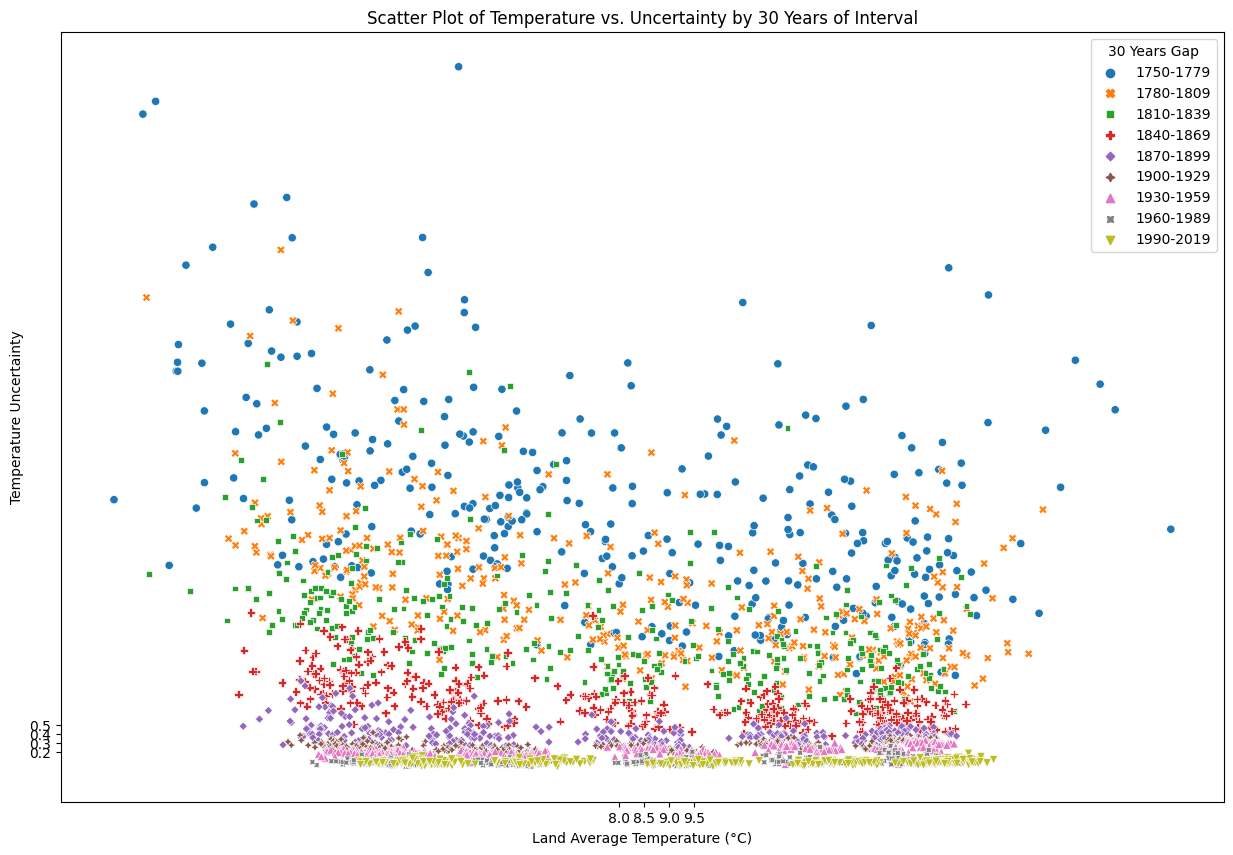

In [24]:

fig, ax = plt.subplots(figsize=(15, 10))  # Define the figure object

# Scatter plot
scatterplot = sns.scatterplot(data=df, x='LandAverageTemperature', y='LandAverageTemperatureUncertainty', hue='Interval', style='Interval')

# Customizing the x and y-axis ticks
ticks_x = [8.0, 8.5, 9.0, 9.5]
ticks_y = [0.2, 0.3, 0.4, 0.5]
ax.set_xticks(ticks_x)
ax.set_yticks(ticks_y)

plt.title('Scatter Plot of Temperature vs. Uncertainty by 30 Years of Interval')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Temperature Uncertainty')

plt.legend(title='30 Years Gap')

plt.show()

In [25]:
#Removing missing values from whole data
New_df = df.dropna()

In [26]:
New_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Interval
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1840-1869
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1840-1869
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1840-1869
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1840-1869
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1840-1869


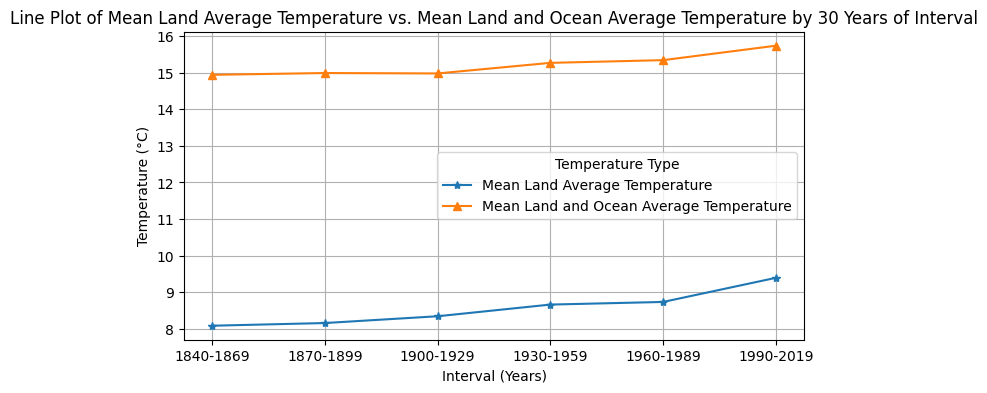

In [27]:
#Creating a line plots of two trends 'LandAverageTemperature', 'LandAndOceanAverageTemperature'
plt.figure(figsize=(8, 4))

# Calculate the mean for 'LandAverageTemperature' and 'LandAndOceanAverageTemperature' for each interval
mean_land_temp = New_df.groupby('Interval')['LandAverageTemperature'].mean()
mean_land_ocean_temp = New_df.groupby('Interval')['LandAndOceanAverageTemperature'].mean()

# Create line plots for the mean values
plt.plot(mean_land_temp.index, mean_land_temp, label='Mean Land Average Temperature', marker='*')
plt.plot(mean_land_ocean_temp.index, mean_land_ocean_temp, label='Mean Land and Ocean Average Temperature', marker='^')

plt.title('Line Plot of Mean Land Average Temperature vs. Mean Land and Ocean Average Temperature by 30 Years of Interval')
plt.xlabel('Interval (Years)')
plt.ylabel('Temperature (°C)')

plt.legend(title='Temperature Type')
plt.grid(True)  # Add a grid

plt.show()

In [28]:
# Extracting data for the two groups
group1 = New_df['LandAverageTemperature']
group2 = New_df['LandAndOceanAverageTemperature']

# Performing the independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Checking the p-value to determine significance
alpha = 0.05  #significance level
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between LandAverageTemperature and LandAndOceanAverageTemperature.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between LandAverageTemperature and LandAndOceanAverageTemperature.")

#print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


Reject the null hypothesis - There is a significant difference between LandAverageTemperature and LandAndOceanAverageTemperature.
t-statistic: -66.61392196659224
p-value: 0.0


In [29]:
#Loading the second dataset of climate change by Country
df1 = pd.read_csv("https://raw.githubusercontent.com/mab253/dataviz_fall23/main/midterm-datasets/climate-datasets/GlobalLandTemperaturesByCountry.csv")
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [30]:
#Loading the third dataset of climate change by City
df2 = pd.read_csv("https://raw.githubusercontent.com/mab253/dataviz_fall23/main/midterm-datasets/climate-datasets/GlobalLandTemperaturesByMajorCity.csv")
df2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [31]:
#checking the shape of Country data
df1.shape

(577462, 4)

In [32]:
#checking the shape of City data
df2.shape

(239177, 7)

In [33]:
#Getting more information about Country data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [34]:
##Getting more information about City data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [35]:
#Handling missing values and duplicates
df_country = df1.dropna()
df_country.drop_duplicates()
df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [36]:
#Handling missing values and duplicates
df_city = df2.dropna()
df_city.drop_duplicates()
df_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


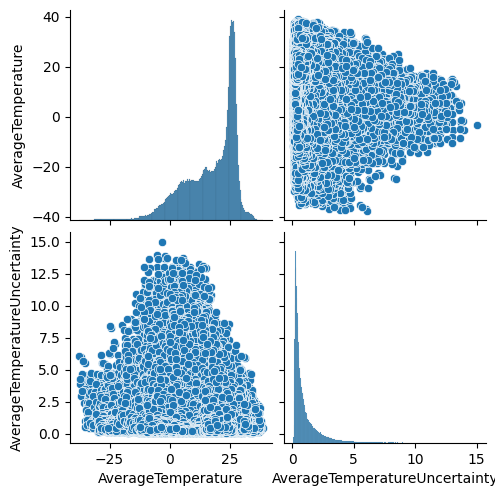

In [37]:
#craeting pairplot for country data
sns.pairplot(data =df_country)
plt.show()

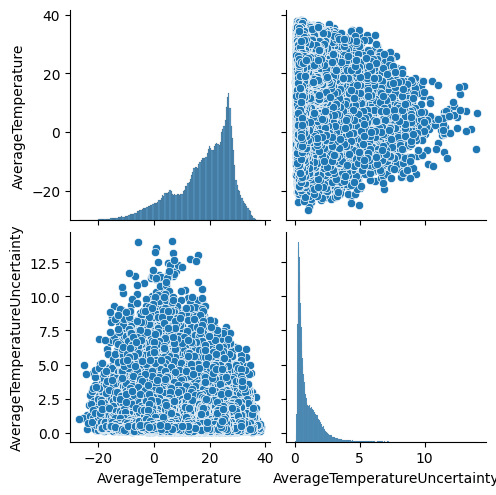

In [38]:
#craeting pairplot for city data
sns.pairplot(data = df_city)
plt.show()

In [39]:
#Grouping the dt column according to 25 years inetrvals
#by first converting 'dt' column to a datetime data type
#then creating a variable 'Intervals' for 'dt'
#Loop through each date in the 'dt' column
#Adding interval column into dataframe
#then printing it

df_country['dt'] = pd.to_datetime(df_country['dt'])
# Initializing an empty list to store intervals
Intervals_Country = []
starting_year_country = 1743
interval_gap = 25
# Looping through each date in the "dt" column
for date in df_country['dt']:
    year = date.year
    interval_start = starting_year_country
    interval_end = starting_year_country + interval_gap - 1

    # Checking if the year belongs to the next interval
    while year > interval_end:
        interval_start += interval_gap
        interval_end += interval_gap

    Intervals_Country.append(f"{interval_start}-{interval_end}")

# Adding the intervals as a new column in the existing DataFrame
df_country['Interval'] = Intervals_Country

# Checking first few rows
df_country.head()

<ipython-input-39-9aac374a5775>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['dt'] = pd.to_datetime(df_country['dt'])
<ipython-input-39-9aac374a5775>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Interval'] = Intervals_Country


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Interval
0,1743-11-01,4.384,2.294,Åland,1743-1767
5,1744-04-01,1.530,4.680,Åland,1743-1767
6,1744-05-01,6.702,1.789,Åland,1743-1767
7,1744-06-01,11.609,1.577,Åland,1743-1767
8,1744-07-01,15.342,1.410,Åland,1743-1767


<ipython-input-40-70410c7149ae>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


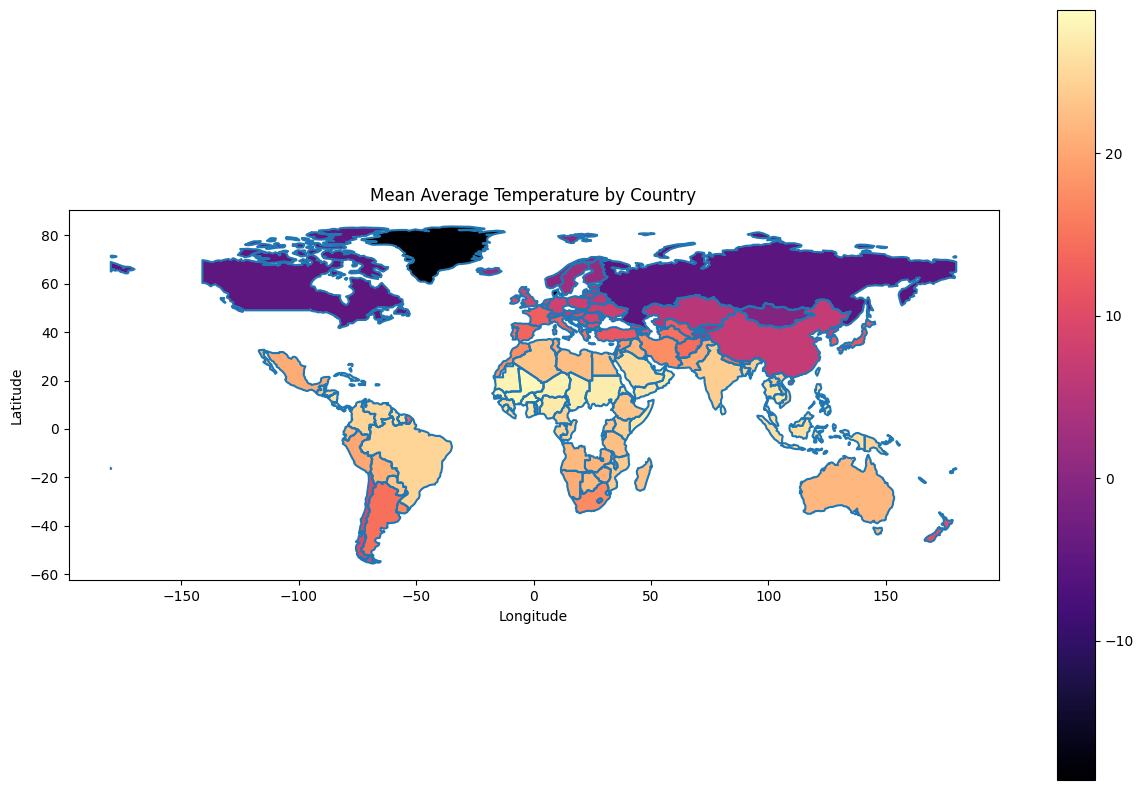

In [40]:
geo_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_data = geo_data.merge(df_country.groupby('Country')['AverageTemperature'].mean().reset_index(), left_on='name', right_on='Country')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_data.boundary.plot(ax=ax)
geo_data.plot(column='AverageTemperature', cmap='magma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Mean Average Temperature by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

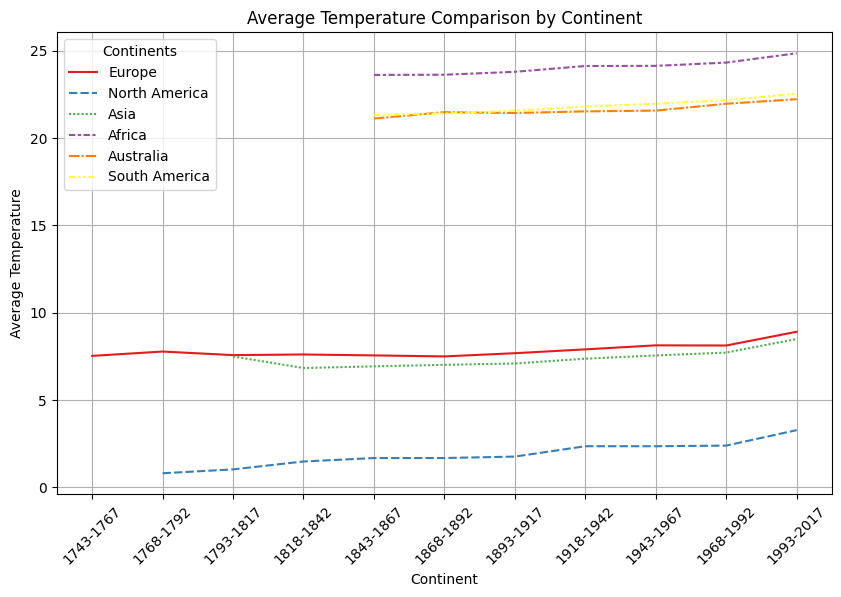

In [41]:
#Creating a lineplot to check mean avergae trend between continents
# List of target continents
target_continents = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Australia']

# Filter the data for the target continents
filtered_data = df_country[df_country['Country'].isin(target_continents)]

# Calculate the mean average temperature for each continent
mean_temperatures = filtered_data.groupby(['Interval', 'Country'])['AverageTemperature'].mean().reset_index()

# Create a line plot with seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(x= 'Interval', y='AverageTemperature', hue='Country', data=mean_temperatures, style='Country', palette='Set1')
plt.xlabel('Continent')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Comparison by Continent')
plt.xticks(rotation=45)
plt.legend(title='Continents')
plt.grid(True)
plt.show()

<ipython-input-42-407d8062e153>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Interval'] = pd.Categorical(filtered_data['Interval'], ordered=True, categories=unique_intervals)


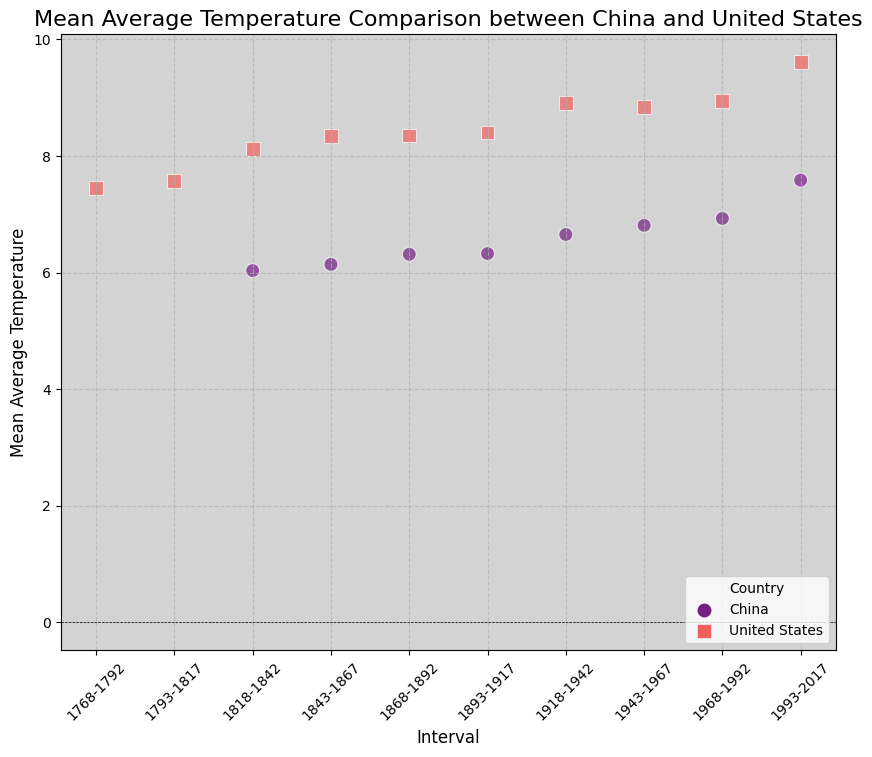

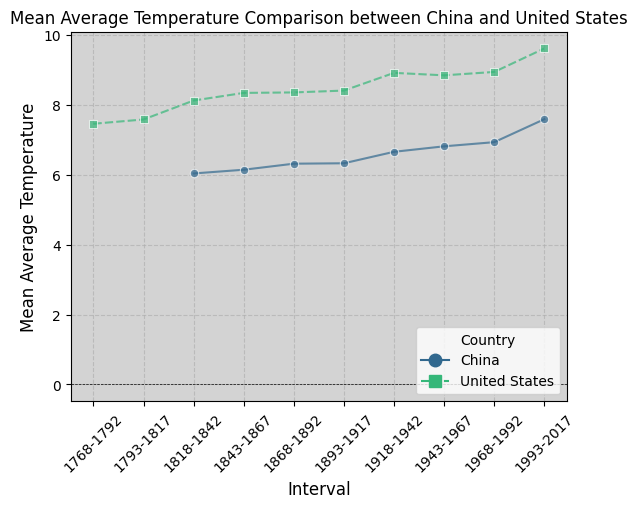

Fail to reject the null hypothesis
There is no significant difference between the mean average temperatures in the United States and China.


In [42]:
#To compare trends amnong developed country and recently developed country filtering two major countries China and USA from whole dataset

# Filter the data for China and the United States
filtered_data = df_country[df_country['Country'].isin(['China', 'United States'])]

# Extract the unique intervals
unique_intervals = filtered_data['Interval'].unique()

# Sort the intervals based on the starting year
unique_intervals = sorted(unique_intervals, key=lambda x: int(x.split('-')[0]))

# Create a categorical data type for intervals
filtered_data['Interval'] = pd.Categorical(filtered_data['Interval'], ordered=True, categories=unique_intervals)
# Group by 'Country', 'Interval', and calculate the mean temperature for each country in each interval
average_temperatures = filtered_data.groupby(['Country', 'Interval'])['AverageTemperature'].mean().reset_index()


plt.figure(figsize=(10,8))

# Use Seaborn for a scatter plot with different colors and markers for each country
sns.scatterplot(data=average_temperatures, x='Interval', y='AverageTemperature', hue='Country', style='Country', palette='magma', markers=['o', 's'], alpha=0.7, s=100)

plt.title('Mean Average Temperature Comparison between China and United States', fontsize=16)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Mean Average Temperature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
plt.legend(title='Country', markerscale=1.5, loc='lower right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Customize background color
plt.gca().set_facecolor('lightgray')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

plt.show()


sns.lineplot(data=average_temperatures, x='Interval', y='AverageTemperature', hue='Country', style='Country', palette='viridis', markers=['o', 's'], alpha=0.7)

plt.title('Mean Average Temperature Comparison between China and United States', fontsize=12)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Mean Average Temperature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
plt.legend(title='Country', markerscale=1.5, loc='lower right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Customize background color
plt.gca().set_facecolor('lightgray')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

plt.show()


# Extracting data for the United States and China and applying student test for the mean significance differnce
us_temperatures = average_temperatures[average_temperatures['Country'] == 'United States']['AverageTemperature']
china_temperatures = average_temperatures[average_temperatures['Country'] == 'China']['AverageTemperature']

# Performing an independent samples t-test
t_stat, p_value = stats.ttest_ind(us_temperatures, china_temperatures, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between the mean average temperatures in the United States and China.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between the mean average temperatures in the United States and China.")



In [43]:
#Grouping the dt column according to 21 years interval
#by first converting 'dt' column to a datetime data type
#then creating a variable 'Intervals' for 'dt'
#Loop through each date in the 'dt' column
#Adding Interval column into dataframe
#then printing it

df_city['dt'] = pd.to_datetime(df_city['dt'])

# Starting year for the first interval
starting_year_city = 1849
intervals = 21

# Initializing an empty list to store intervals
Intervals_City = []

# Looping through each date in the "dt" column
for date in df_city['dt']:
    year = date.year
    interval_start = starting_year_city
    interval_end = starting_year_city + intervals - 1

    # Checking if the year belongs to the next interval
    while year > interval_end:
        interval_start += intervals
        interval_end += intervals

    Intervals_City.append(f"{interval_start}-{interval_end}")

# Adding the intervals as a new column in the existing DataFrame
df_city['Interval'] = Intervals_City

# Checking first few rows
df_city.head()
df_city.tail()

<ipython-input-43-65396a483381>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['dt'] = pd.to_datetime(df_city['dt'])
<ipython-input-43-65396a483381>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['Interval'] = Intervals_City


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Interval
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E,1996-2016
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,1996-2016
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,1996-2016
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,1996-2016
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,1996-2016


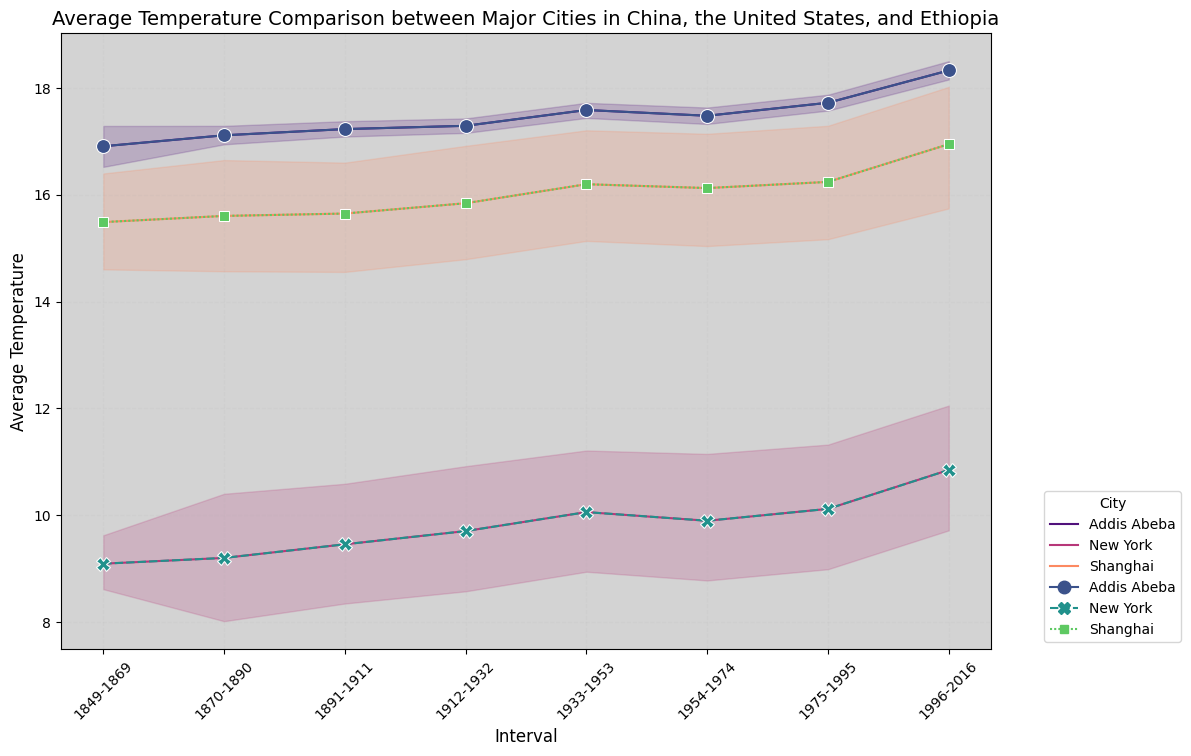

In [44]:
#For the percentage increase in the mean average temperature among cities of developed and less developed countries selecting three cities from China, USA and Ethiopia

# Specify the major cities
major_cities = ['Shanghai', 'New York', 'Addis Abeba']

# Filter the data to include only major cities
filtered_data = df_city[df_city['City'].isin(major_cities)]

plt.figure(figsize=(12, 8))


# Use Seaborn to create a line plot with different colors for each city (hue)
sns.lineplot(data=filtered_data, x='Interval', y='AverageTemperature', hue='City', palette='magma',dashes = False)

# Calculate and plot the mean for each city
city_means = filtered_data.groupby(['City', 'Interval'])['AverageTemperature'].mean().reset_index()
sns.lineplot(data=city_means, x='Interval', y='AverageTemperature', hue='City', palette='viridis', style='City', markers=True, markersize=10)

plt.title('Average Temperature Comparison between Major Cities in China, the United States, and Ethiopia', fontsize=14)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)

# Customize the legend and move it outside
plt.legend(title='City', markerscale=1.5, loc='lower left', bbox_to_anchor=(1.05, 0))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Customize background color
plt.gca().set_facecolor('lightgray')

plt.show()

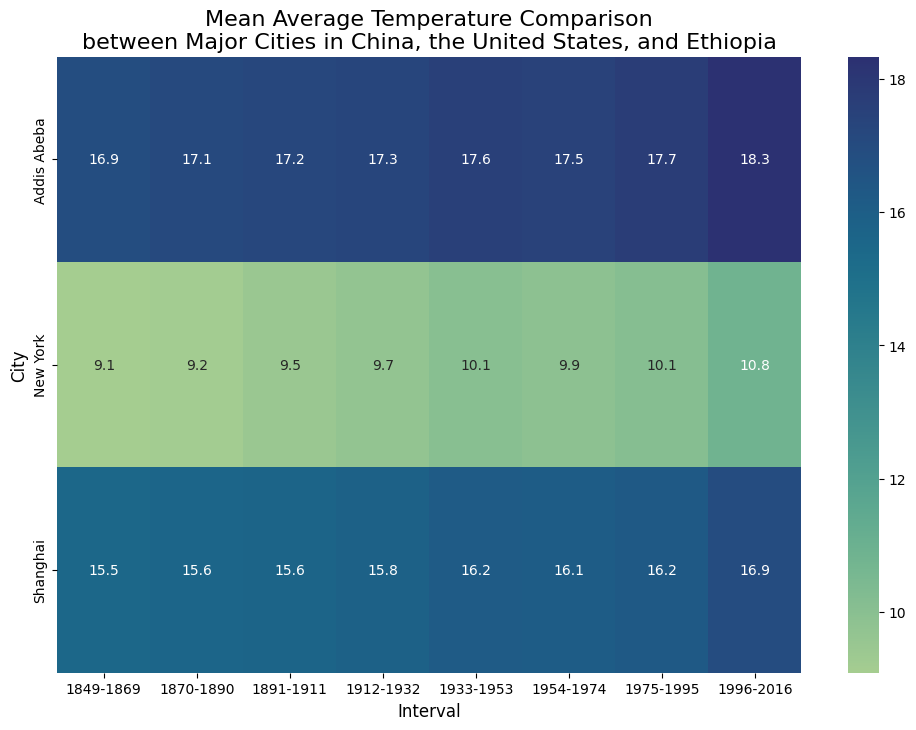

In [45]:
# Specify the major cities
major_cities = ['Shanghai', 'New York', 'Addis Abeba']

# Filter the data to include only major cities
filtered_data = df_city[df_city['City'].isin(major_cities)]

plt.figure(figsize=(12, 8))

# Calculate and pivot the data
city_means = filtered_data.groupby(['City', 'Interval'])['AverageTemperature'].mean().reset_index()
pivoted = city_means.pivot(index='City', columns='Interval', values='AverageTemperature')

# Create a heatmap-like plot
sns.heatmap(pivoted, cmap='crest', cbar=True, annot=True, fmt='.1f')

plt.title('Mean Average Temperature Comparison\nbetween Major Cities in China, the United States, and Ethiopia', fontsize=16)
plt.xlabel('Interval', fontsize=12)
plt.ylabel('City', fontsize=12)

# Customize background color
plt.gca().set_facecolor('lightgray')

plt.show()


# Report

Introduction:
Due to climate change, the world is grappling with rising temperatures, shifting climate patterns, and an increasing frequency of extreme weather events. These phenomena affect every ecosystem and community across the globe. In this context, comprehensive, reliable climate datasets have become indispensable tools for monitoring, analyzing, and addressing the multifaceted issues associated with climate change. This report delves into three distinct climate datasets, exploring global land and ocean temperature shifts as well as climate trends within countries and their major cities. This exploration provides insights into the intricate web of climate change, spanning from global to localized impacts.

Methodology:
This report commences with the importation of climate datasets, with a specific focus on land and ocean temperature measurements. These datasets cover distinct periods, both at the country and city levels. A comprehensive data cleaning process is implemented, encompassing data information retrieval, summary description, handling of missing values, and removal of duplicates. To gain an initial visual understanding of the datasets, pairplots are created.

The data is harmonized into a coherent framework to facilitate analysis. It is categorized into suitable time intervals, allowing for in-depth analysis.

The report investigates whether the significant rise in average temperatures over the last few centuries is isloated to developed or newly developed countries (the major contributors to global warming) or if the effect is worldwide.

For the first dataset, visualizations are developed to analyze global temperature trends over selected time intervals, providing insights into long-term climate patterns. The second dataset is visualized to compare temperature trends in selected developed countries. The third dataset focuses on visualizing the temperature profiles of major cities, emphasizing localized variations.

Research Assumptions:
Analysis of Global Climate Data: Statistical analysis and trend detection techniques are applied to investigate significant trends or anomalies in global land and ocean temperatures.
Comparison of Developed Countries: A comparative analysis is conducted to assess variations in average temperature profiles between two developed countries. Statistical tests are employed to identify significant differences.
Localized Climate Analysis: The study examines temperature trends in major cities to identify potential localized variations compared to national climate patterns. Statistical methods are applied to test for significant differences.

Hypothesis Testing:

Hypothesis 1:
Null Hypothesis (H0): There is no significant difference in Land Average Temperature across the 30-year intervals.
Alternative Hypothesis (H1): Land Average Temperature significantly varies across the 30-year intervals.

Hypothesis 2:
Null Hypothesis (H0): The change in mean average temperature in the United States is not significantly different from the mean average temperature in China over time.
Alternative Hypothesis (H1): The mean average temperature in the United States is significantly different from the mean average temperature in China over time.

Statistical Plan:
I tested the two hypotheses for the data by performing ANOVA test and Student t-test and individually checked the percentage increase for major cities over time.

Conclusion:
The final visualizations yield the following key conclusions:

Global Climate Analysis:
The boxplots clearly illustrate the mean land average temperature has increased over time. The ANOVA test and Tukey HSD test provide robust evidence of significant temperature differences across various time intervals. Notably, the most recent interval (1990-2019) exhibits significant differences from earlier periods, emphasizing the accelerated temperature changes in recent years.

Comparison of Developed Countries:
Both scatterplots and lineplots indicate an increase in the mean temperature over time. The t-test further reinforces the findings, demonstrating that there is no significant difference in the increase of mean temperature over time between the developed country (United States) and the recently developed country (China). Specifically, both countries have seen a more rapid increase in average temperatures since the 1800s, despite China not being industrialized at that time.

Localized Climate Analysis:
The heatmap visualization showcases the mean changes in average temperature among three major cities: two developed and one undeveloped country. Shanghai's temperature demonstrates a gradual increase, with a percentage increase ranging from approximately 0.75% to about 9.42% over the selected intervals. This suggests a steady temperature rise in Shanghai.
New York experienced a more substantial temperature increase, ranging from about 1.19% to approximately 19.31% over the selected intervals, indicating a significant climate change. Addis Abeba exhibited a percentage increase of about 1.21% to 8.40% over the same intervals, signifying a substantial albeit relatively lower temperature change compared to New York.

These conclusions shed light on the complex dynamics of global and localized climate trends, emphasizing the need for ongoing monitoring and efforts to mitigate the impacts of climate change. This report demonstrates that global warming truly is a worldwide phenomenon. The findings underscore the importance of taking collective action to address this critical global challenge.

The data could have been more comprehensive. Specifically, the datasets were missing information about countries most at risk from climate change such as New Zealand, Maldives, etc.